In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True )


In [ ]:
data_dir

'./datasets/flower_photos'

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/5897035797_e67bf68124_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4503599544_3822e7d1be.jpg'),
 PosixPath('datasets/flower_photos/roses/3661675690_ed2d05fa5f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg')]

[PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/5897035797_e67bf68124_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4503599544_3822e7d1be.jpg'),
 PosixPath('datasets/flower_photos/roses/3661675690_ed2d05fa5f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg')]

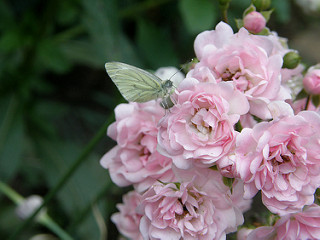

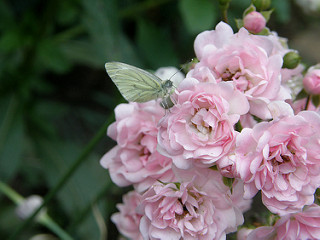

In [ ]:
PIL.Image.open(str(roses[1]))

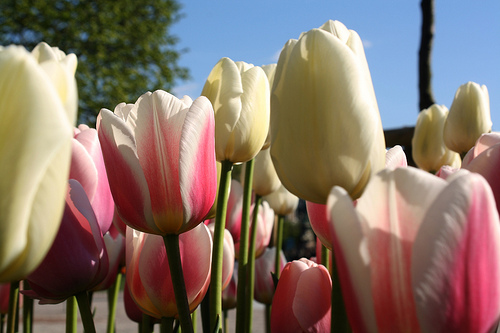

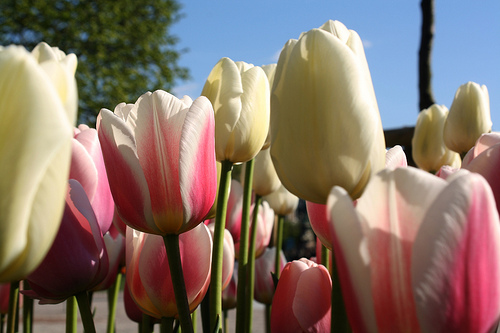

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_label_dict = {
     'roses' : 0,
     'daisy' : 1,
     'dandelion' : 2,
     'sunflowers' : 3,
     'tulips' : 4,
}

In [ ]:
str(flowers_image_dict['roses'][0])

'datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'

'datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'

array([[[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  0,  28, 193],
        [  0,  28, 193],
        [  0,  28, 193]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  0,  28, 193],
        [  0,  28, 193],
        [  0,  28, 193]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  0,  28, 193],
        [  0,  28, 193],
        [  0,  28, 193]],

       ...,

       [[  6,   9,   7],
        [  5,   7,   7],
        [  4,   6,   6],
        ...,
        [  5,  10,   8],
        [  4,   9,   7],
        [  5,  10,   8]],

       [[  6,   8,   9],
        [  7,   9,   9],
        [  6,   8,   8],
        ...,
        [  5,  12,   9],
        [  5,  12,   9],
        [  6,  11,   9]],

       [[  4,   6,   7],
        [  5,   7,   7],
        [  4,   6,   6],
        ...,
        [  5,  12,   9],
        [  5,  12,   9],
        [  6,  11,   9]]], dtype=uint8)
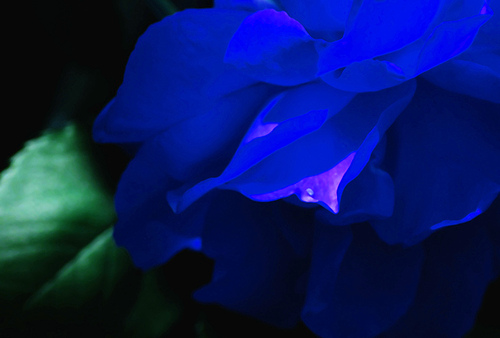

array([[[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  0,  28, 193],
        [  0,  28, 193],
        [  0,  28, 193]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  0,  28, 193],
        [  0,  28, 193],
        [  0,  28, 193]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  0,  28, 193],
        [  0,  28, 193],
        [  0,  28, 193]],

       ...,

       [[  6,   9,   7],
        [  5,   7,   7],
        [  4,   6,   6],
        ...,
        [  5,  10,   8],
        [  4,   9,   7],
        [  5,  10,   8]],

       [[  6,   8,   9],
        [  7,   9,   9],
        [  6,   8,   8],
        ...,
        [  5,  12,   9],
        [  5,  12,   9],
        [  6,  11,   9]],

       [[  4,   6,   7],
        [  5,   7,   7],
        [  4,   6,   6],
        ...,
        [  5,  12,   9],
        [  5,  12,   9],
        [  6,  11,   9]]], dtype=uint8)
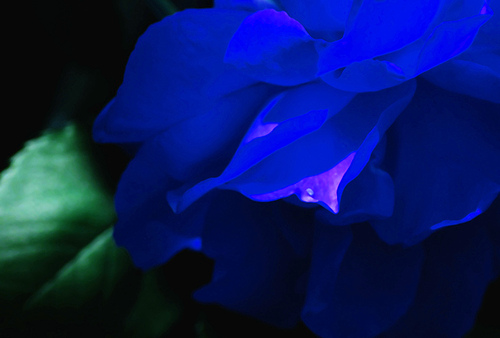

In [ ]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

In [ ]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_label_dict[flower_name])


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
len(X_train)

2752

2752

In [ ]:
len(X_test)

918

918

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = keras.Sequential([

                          layers.Conv2D(16, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(32, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(64, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(),
                          layers.Flatten(),

                          layers.Dense(128, activation='relu'),
                          layers.Dense(num_classes)

])
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs= 10)

Epoch 1/10
86/86 [==============================] - 86s 945ms/step - loss: 1.2888 - accuracy: 0.4586
Epoch 2/10
86/86 [==============================] - 76s 877ms/step - loss: 0.9942 - accuracy: 0.6072
Epoch 3/10
86/86 [==============================] - 74s 860ms/step - loss: 0.8242 - accuracy: 0.6886
Epoch 4/10
86/86 [==============================] - 75s 875ms/step - loss: 0.6133 - accuracy: 0.7707
Epoch 5/10
86/86 [==============================] - 76s 879ms/step - loss: 0.4072 - accuracy: 0.8514
Epoch 6/10
86/86 [==============================] - 76s 883ms/step - loss: 0.2626 - accuracy: 0.9153
Epoch 7/10
86/86 [==============================] - 75s 878ms/step - loss: 0.1384 - accuracy: 0.9589
Epoch 8/10
86/86 [==============================] - 76s 880ms/step - loss: 0.0699 - accuracy: 0.9793
Epoch 9/10
86/86 [==============================] - 80s 932ms/step - loss: 0.0541 - accuracy: 0.9851
Epoch 10/10
86/86 [==============================] - 76s 888ms/step - loss: 0.0207 - accura

Epoch 1/10
86/86 [==============================] - 76s 872ms/step - loss: 1.2909 - accuracy: 0.4633
Epoch 2/10
86/86 [==============================] - 73s 852ms/step - loss: 0.9544 - accuracy: 0.6374
Epoch 3/10
86/86 [==============================] - 74s 864ms/step - loss: 0.7772 - accuracy: 0.7078
Epoch 4/10
86/86 [==============================] - 74s 867ms/step - loss: 0.6003 - accuracy: 0.7816
Epoch 5/10
86/86 [==============================] - 77s 895ms/step - loss: 0.3879 - accuracy: 0.8612
Epoch 6/10
86/86 [==============================] - 78s 910ms/step - loss: 0.2543 - accuracy: 0.9092
Epoch 7/10
86/86 [==============================] - 75s 872ms/step - loss: 0.1248 - accuracy: 0.9644
Epoch 8/10
86/86 [==============================] - 74s 863ms/step - loss: 0.0509 - accuracy: 0.9855
Epoch 9/10
86/86 [==============================] - 75s 878ms/step - loss: 0.0371 - accuracy: 0.9913
Epoch 10/10
86/86 [==============================] - 75s 878ms/step - loss: 0.0303 - accura

In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 9s 288ms/step - loss: 2.2573 - accuracy: 0.6231


[2.257274866104126, 0.6230936646461487]

29/29 [==============================] - 9s 293ms/step - loss: 1.8779 - accuracy: 0.6383


[1.877860426902771, 0.6383442282676697]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 7s 252ms/step


array([[  0.13027208,   3.0584037 ,   5.58413   ,  -8.492018  ,
         -1.7409068 ],
       [ 13.83517   ,  -9.054848  , -15.330052  , -20.012402  ,
          7.656966  ],
       [ -3.672244  ,  -8.459599  ,   4.7809467 ,   3.2304776 ,
          0.28094664],
       ...,
       [ -4.6489735 ,  -2.0155394 ,   2.698832  ,  11.171602  ,
         -5.1147165 ],
       [  0.8845229 ,   1.7797173 ,  -0.07564005,  -4.7380176 ,
          0.7709877 ],
       [ -5.061194  ,  -4.836124  ,  -6.5862226 ,  11.685583  ,
          5.214597  ]], dtype=float32)

29/29 [==============================] - 8s 289ms/step


array([[  1.8183686 ,   2.568477  ,   8.028218  ,  -7.5685234 ,
         -3.245096  ],
       [ 11.158717  ,  -8.447567  ,  -6.115414  , -11.402319  ,
          5.267     ],
       [ -4.038502  , -13.664311  ,   8.711294  ,   2.227696  ,
         -0.04446153],
       ...,
       [ -0.30560994, -11.550132  ,  -0.29768994,  11.999003  ,
         -8.902275  ],
       [  0.678337  ,   1.360776  ,   2.9623437 ,  -5.5689216 ,
          0.3181613 ],
       [ -5.7134323 ,  -8.859562  ,  -6.2964897 ,   9.492214  ,
          0.31347036]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.9447006e-03, 7.3737018e-02, 9.2171031e-01, 7.1023402e-07,
       6.0725556e-04], dtype=float32)>

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.99700380e-03, 4.22811462e-03, 9.93762076e-01, 1.67380009e-07,
       1.26282785e-05], dtype=float32)>

In [ ]:
np.argmax(score)

2

2

In [ ]:
y_test[0]

1

1

In [ ]:
img_height =180
img_width = 180

In [ ]:
data_augmentation = keras.Sequential([

                  layers.experimental.preprocessing.RandomFlip('horizontal',
                                                               input_shape=(img_height,
                                                                            img_width,
                                                                            3)),
                  layers.experimental.preprocessing.RandomRotation(0.1),
                  layers.experimental.preprocessing.RandomZoom(0.1),
])

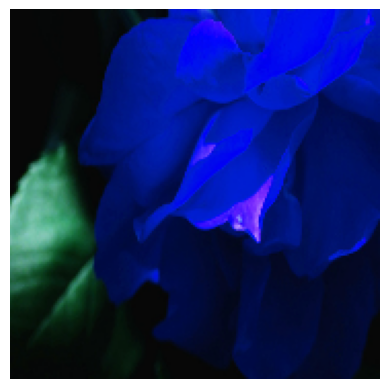

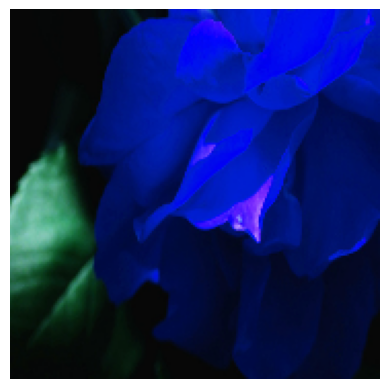

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
num_classes = 5

model = keras.Sequential([

                          data_augmentation,
                          layers.Conv2D(16, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(32, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(64, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(),
                          layers.Dropout(0.2),
                          layers.Flatten(),

                          layers.Dense(128, activation='relu'),
                          layers.Dense(num_classes)

])
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs= 10)

Epoch 1/10
86/86 [==============================] - 91s 1s/step - loss: 1.3169 - accuracy: 0.4419
Epoch 2/10
86/86 [==============================] - 89s 1s/step - loss: 1.0125 - accuracy: 0.6010
Epoch 3/10
86/86 [==============================] - 89s 1s/step - loss: 0.8911 - accuracy: 0.6562
Epoch 4/10
86/86 [==============================] - 90s 1s/step - loss: 0.8675 - accuracy: 0.6642
Epoch 5/10
86/86 [==============================] - 89s 1s/step - loss: 0.7879 - accuracy: 0.6959
Epoch 6/10
86/86 [==============================] - 89s 1s/step - loss: 0.7559 - accuracy: 0.7060
Epoch 7/10
86/86 [==============================] - 94s 1s/step - loss: 0.7109 - accuracy: 0.7318
Epoch 8/10
86/86 [==============================] - 90s 1s/step - loss: 0.6978 - accuracy: 0.7362
Epoch 9/10
86/86 [==============================] - 90s 1s/step - loss: 0.6440 - accuracy: 0.7562
Epoch 10/10
86/86 [==============================] - 93s 1s/step - loss: 0.6290 - accuracy: 0.7569


In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 9s 295ms/step - loss: 0.8566 - accuracy: 0.7059


[0.8566148281097412, 0.7058823704719543]